# Quién es Quién en los Precios
## OPI analytics - Prueba técnica Data Scientist (Intermedio)
- **Made by:** Jorge Salvador Ruiz Montaño
- **Fecha:** Noviembre 2020

## Configuración del entorno de Spark

In [17]:
# Librerias
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Librerias Spark (dataframes)
from pyspark.sql.types import StructType, StructField 
from pyspark.sql.types import IntegerType, StringType, FloatType, DateType
from pyspark.sql.types import Row

# Librerias para Spark SQL
from pyspark.sql import SQLContext

# Librerias para graficado
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

In [2]:
# Inicializar Spark
spark = SparkContext(master='local', appName='QQP')
# Inicializando SQL Context
sqlContext = SQLContext(spark)

In [3]:
# Creación del PATH al archivo .csv
path = '/home/lastorder/Documents/OPI/QQP/all_data.csv'

In [4]:
# Revisamos la estructura de la base de datos:
!head -n 4 /home/lastorder/Documents/OPI/QQP/all_data.csv

"producto","presentacion","marca","categoria","catalogo","precio","fechaRegistro","cadenaComercial","giro","nombreComercial","direccion","estado","municipio","latitud","longitud"
"CUADERNO FORMA ITALIANA","96 HOJAS PASTA DURA. CUADRICULA CHICA","ESTRELLA","MATERIAL ESCOLAR","UTILES ESCOLARES",25.9,"2011-05-18 00:00:00.000","ABASTECEDORA LUMEN","PAPELERIAS","ABASTECEDORA LUMEN SUCURSAL VILLA COAPA","CANNES No. 6 ESQ. CANAL DE MIRAMONTES","DISTRITO FEDERAL","TLALPAN                                 ",19.29699,-99.125417
"CRAYONES","CAJA 12 CERAS. JUMBO. C.B. 201423","CRAYOLA","MATERIAL ESCOLAR","UTILES ESCOLARES",27.5,"2011-05-18 00:00:00.000","ABASTECEDORA LUMEN","PAPELERIAS","ABASTECEDORA LUMEN SUCURSAL VILLA COAPA","CANNES No. 6 ESQ. CANAL DE MIRAMONTES","DISTRITO FEDERAL","TLALPAN                                 ",19.29699,-99.125417
"CRAYONES","CAJA 12 CERAS. TAMANO REGULAR C.B. 201034","CRAYOLA","MATERIAL ESCOLAR","UTILES ESCOLARES",13.9,"2011-05-18 00:00:00.000","ABASTECEDORA LUMEN

In [5]:
# Creamos el schema con la información de las columnas:

qqpSchema = StructType([
    StructField('producto',StringType(),False),
    StructField('presentacion',StringType(),False),
    StructField('marca',StringType(),False),
    StructField('categoria',StringType(),False),
    StructField('catalogo',StringType(),False),
    StructField('precio',FloatType(),False),
    StructField('fechaRegistro',DateType(),False),
    StructField('cadenaComercial',StringType(),False),
    StructField('giro',StringType(),False),
    StructField('nombreComercial',StringType(),False),
    StructField('direccion',StringType(),False),
    StructField('estado',StringType(),False),
    StructField('municipio',StringType(),False),
    StructField('latitud',FloatType(),False),
    StructField('longitud',FloatType(),False)
])

# Creamos el dataframe usando nuestro schema y el archivo .csv

qqpDF = sqlContext.read.schema(qqpSchema).option('header','true') \
    .csv('all_data.csv')

In [6]:
# Corremos una acción de Spark para verificar que todo esté bien.
qqpDF.show(10)

+--------------------+--------------------+------------------+----------------+----------------+------+-------------+------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------+---------+
|            producto|        presentacion|             marca|       categoria|        catalogo|precio|fechaRegistro|   cadenaComercial|                giro|     nombreComercial|           direccion|          estado|           municipio| latitud| longitud|
+--------------------+--------------------+------------------+----------------+----------------+------+-------------+------------------+--------------------+--------------------+--------------------+----------------+--------------------+--------+---------+
|CUADERNO FORMA IT...|96 HOJAS PASTA DU...|          ESTRELLA|MATERIAL ESCOLAR|UTILES ESCOLARES|  25.9|   2011-05-18|ABASTECEDORA LUMEN|          PAPELERIAS|ABASTECEDORA LUME...|CANNES No. 6 ESQ....|DISTRITO FEDERAL|TLALPAN      

In [7]:
# Eliminamos las filas que no vengan completas (que contengan campos en null).
# Se podrían llenar algunos de esos nulls con valores aproximados pero por cuestiones de tiempo nos quedaremos con las filas que no contengan nulos.
qqpDF = qqpDF.dropna()

In [8]:
# Registramos la tabla para poder usar SQL context de Spark y trabajar con consultas SQL tradicionales.
qqpDF.registerTempTable('qqpDF')

In [9]:
# Ejecutamos una acción usando una consulta simple.
sqlContext.sql('SELECT * FROM qqpDF').show(5)

+--------------------+--------------------+--------+----------------+----------------+------+-------------+------------------+----------+--------------------+--------------------+----------------+--------------------+--------+---------+
|            producto|        presentacion|   marca|       categoria|        catalogo|precio|fechaRegistro|   cadenaComercial|      giro|     nombreComercial|           direccion|          estado|           municipio| latitud| longitud|
+--------------------+--------------------+--------+----------------+----------------+------+-------------+------------------+----------+--------------------+--------------------+----------------+--------------------+--------+---------+
|CUADERNO FORMA IT...|96 HOJAS PASTA DU...|ESTRELLA|MATERIAL ESCOLAR|UTILES ESCOLARES|  25.9|   2011-05-18|ABASTECEDORA LUMEN|PAPELERIAS|ABASTECEDORA LUME...|CANNES No. 6 ESQ....|DISTRITO FEDERAL|TLALPAN          ...|19.29699|-99.12542|
|            CRAYONES|CAJA 12 CERAS. JU...| CRAYOLA|

## Procesamiento de Datos:

In [11]:
# a) ¿Cuántos registros hay?
sqlContext.sql('SELECT COUNT(producto) FROM qqpDF').show(5)

+---------------+
|count(producto)|
+---------------+
|       60489344|
+---------------+



In [12]:
# b) ¿Cuántas categorias hay?
sqlContext.sql('SELECT COUNT(DISTINCT categoria) FROM qqpDF').show(5)

+-------------------------+
|count(DISTINCT categoria)|
+-------------------------+
|                       40|
+-------------------------+



In [13]:
# c) ¿Cuántas cadenas comerciales están siendo monitoreadas?
sqlContext.sql('SELECT COUNT(DISTINCT cadenaComercial) FROM qqpDF').show(5)

+-------------------------------+
|count(DISTINCT cadenaComercial)|
+-------------------------------+
|                            649|
+-------------------------------+



In [ ]:
# d) ¿Cómo podrías determinar la calidad de los datos?¿Detectaste algún tipo de inconsistencia o error en la fuente?
# respuesta: Sí, algunos de los rows venían con campos nulos, para realizar correctamente el análisis se eliminaron los rows que contenian nulos con:
# qqpDF = qqpDF.dropna()

In [14]:
# e) ¿Cuáles son los productos más monitoreados en cada entidad?
# Basicamente los productos más traqueados son refrescos.
sqlContext.sql("""
                SELECT  estado,
                        producto,
                        num_producto
                FROM (SELECT estado,
                             producto,
                             COUNT(producto) AS num_producto,
                             ROW_NUMBER() OVER(PARTITION BY estado ORDER BY COUNT(producto) DESC) AS RN
                      FROM qqpDF
                      WHERE estado IS NOT NULL
                      AND municipio IS NOT NULL
                      GROUP BY estado, producto) AS Master_table_product
                WHERE RN = 1
                ORDER BY 3 DESC
                """).show(32)

+--------------------+-----------------+------------+
|              estado|         producto|num_producto|
+--------------------+-----------------+------------+
|    DISTRITO FEDERAL|         REFRESCO|      280420|
|              MÉXICO|         REFRESCO|      189705|
|             JALISCO|         REFRESCO|       80943|
|          GUANAJUATO|         REFRESCO|       48948|
|          NUEVO LEÓN|         REFRESCO|       48881|
|            TLAXCALA|         REFRESCO|       42614|
| MICHOACÁN DE OCAMPO|DETERGENTE P/ROPA|       39348|
|     BAJA CALIFORNIA|         REFRESCO|       36612|
|        QUINTANA ROO|              FUD|       32931|
|             YUCATÁN|         REFRESCO|       32805|
|             SINALOA|         REFRESCO|       32421|
|              SONORA|         REFRESCO|       32059|
|              PUEBLA|         REFRESCO|       31191|
|             TABASCO|         REFRESCO|       28397|
| BAJA CALIFORNIA SUR|         REFRESCO|       27324|
|COAHUILA DE ZARAGOZA|      

In [15]:
# f) ¿Cuál es la cadena comercial con mayor variedad de productos monitoreados?
# Como buscamos "variedad" y no "cantidad" se contaron cuantos productos distintos se ofrecen por cadena comercial.
# Soriana es la cadena que ofrece más productos diferentes para ser monitoreados.
sqlContext.sql("""
                SELECT  cadenaComercial,
                        COUNT(DISTINCT producto)
                FROM qqpDF
                WHERE estado IS NOT NULL
                AND municipio IS NOT NULL
                GROUP BY cadenaComercial
                ORDER BY 2 DESC
               """).show(5)

+--------------------+------------------------+
|     cadenaComercial|count(DISTINCT producto)|
+--------------------+------------------------+
|             SORIANA|                    1046|
|            WAL-MART|                    1038|
|MEGA COMERCIAL ME...|                    1036|
|  COMERCIAL MEXICANA|                    1023|
|            CHEDRAUI|                    1013|
+--------------------+------------------------+
only showing top 5 rows



## Canasta Básica
- Para crear la canasta básica nos basaremos en un estudio de la SEDECO, del mes de octubre del 2020 donde se obtuvieron en que cadenas comerciales se pueden obtener los productos de canasta básica más baratos.
- Link: https://www.sedeco.cdmx.gob.mx/storage/app/media/Canasta%20Basica/2020/Octubre/21%20de%20octubre%202020.pdf
- Para las marcas de los productos también se usaron los indices de precios de la canasta básica por la SEDECO (2018), donde se incluye la marca de cada elemento de la canasta:
- Link: https://sedeco.cdmx.gob.mx/storage/app/media/Canasta%20Basica/2018/Enero/4_INDICE%20DE%20PRECIOS%20DE%20CANASTA%20BASICA%20DE%20LA%20DGACD%20.pdf



In [64]:
# Vamos a hacer en análisis solo con el primer item de la canasta (Aceite de la marca 1-2-3 de CHEDRAUI
# El proceso para la canasta completa 
Base_aceites = sqlContext.sql("""
                SELECT DISTINCT producto, marca, estado, municipio,fechaRegistro, precio 
                FROM qqpDF
                WHERE cadenaComercial = 'CHEDRAUI'
                AND producto LIKE '%ACEITE%'
                AND marca = '1-2-3'
                ORDER BY 6
                """)

In [65]:
# Desplegando el precio ordenado del Aceite por municipio podremos ver en que municipio es más económico y en que fechas.
# Aquí se puede observar que el lugar donde el aceite es más accesible es en Iztapalapa con un precio de 15.3
# Esto es sin tomar en cuenta la fecha de registro.

# a) ¿Cuál es la ciudad más barata del país (Solo en Aceite)? aguascalientes(En 2015-05-20)
Base_aceites.show(5)

+--------+-----+-------------------+--------------------+-------------+------+
|producto|marca|             estado|           municipio|fechaRegistro|precio|
+--------+-----+-------------------+--------------------+-------------+------+
|  ACEITE|1-2-3|     AGUASCALIENTES|      AGUASCALIENTES|   2015-05-20| 15.65|
|  ACEITE|1-2-3|            YUCATÁN|MERIDA           ...|   2011-01-17|  15.8|
|  ACEITE|1-2-3|MICHOACÁN DE OCAMPO|MORELIA          ...|   2011-01-17|  15.8|
|  ACEITE|1-2-3|             MÉXICO|ATIZAPAN         ...|   2011-01-17|  15.8|
|  ACEITE|1-2-3|             MÉXICO|TLALNEPANTLA     ...|   2014-10-06|  16.9|
+--------+-----+-------------------+--------------------+-------------+------+
only showing top 5 rows



In [66]:
# Registramos la base de Aceites para trabajarla como tabla SQL.
Base_aceites.registerTempTable('Base_aceites')

In [67]:
# Ordenando de manera descendiente para ver el precio del aceite más caro.
# ¿Cuál es la ciudad más cara del país (Solo en Aceite)? 
# En este caso sería en Santiago de Queretaro (2013-06-12)
sqlContext.sql("""
                SELECT * FROM Base_aceites
                ORDER BY 6 DESC
                """).show(5)

+--------+-----+---------+--------------------+-------------+------+
|producto|marca|   estado|           municipio|fechaRegistro|precio|
+--------+-----+---------+--------------------+-------------+------+
|  ACEITE|1-2-3|QUERÉTARO|SANTIAGO DE QUERE...|   2013-06-12|  33.1|
|  ACEITE|1-2-3|  YUCATÁN|MERIDA           ...|   2012-07-30| 31.45|
|  ACEITE|1-2-3|  YUCATÁN|MERIDA           ...|   2012-07-23| 31.45|
|  ACEITE|1-2-3|  MORELOS|          CUERNAVACA|   2016-02-29|  30.9|
|  ACEITE|1-2-3|   MÉXICO|TOLUCA           ...|   2013-04-23|  29.9|
+--------+-----+---------+--------------------+-------------+------+
only showing top 5 rows



In [75]:
# Creamos una base solo del área de Iztapala para análizar como han cambiado los precios con el tiempo.
# Nota: lo mismo puede hacerse usando coordenadas en vez de municipio.
Aceites_QRO = sqlContext.sql("""
                SELECT  fechaRegistro,
                        precio        
                FROM Base_aceites
                WHERE municipio = 'AGUASCALIENTES'
                ORDER BY 1 
                """)

In [76]:
# Creamos una base solo del área de Azcapotzalco para análizar como han cambiado los precios con el tiempo.
# Nota: lo mismo puede hacerse usando coordenadas en vez de municipio.
Aceites_Santi = sqlContext.sql("""
                SELECT  fechaRegistro, 
                        precio
                FROM Base_aceites
                WHERE municipio LIKE '%SANTIAGO DE QUERE%'
                ORDER BY 1 
                """)

In [77]:
Aceites_Santi.show(10)

+-------------+------+
|fechaRegistro|precio|
+-------------+------+
|   2011-01-05| 21.85|
|   2011-01-12| 21.85|
|   2011-01-19|  19.9|
|   2011-01-26|  19.9|
|   2011-02-09|  19.9|
|   2011-02-16|  19.9|
|   2011-02-23|  23.5|
|   2011-03-02|  23.5|
|   2011-03-09|  23.5|
|   2011-03-16|  23.5|
+-------------+------+
only showing top 10 rows



In [78]:
Aceites_QRO.show(10)

+-------------+------+
|fechaRegistro|precio|
+-------------+------+
|   2015-01-07|  19.9|
|   2015-01-14|  21.7|
|   2015-01-21| 19.45|
|   2015-01-28|  19.1|
|   2015-02-04|  19.1|
|   2015-02-11|  19.1|
|   2015-02-18|  19.1|
|   2015-02-25|  19.1|
|   2015-03-04|  19.1|
|   2015-03-11|  19.1|
+-------------+------+
only showing top 10 rows



In [79]:
# Creando los dataframes en Pandas
Aceites_QRO = Aceites_QRO.toPandas()
Aceites_Santi = Aceites_Santi.toPandas()

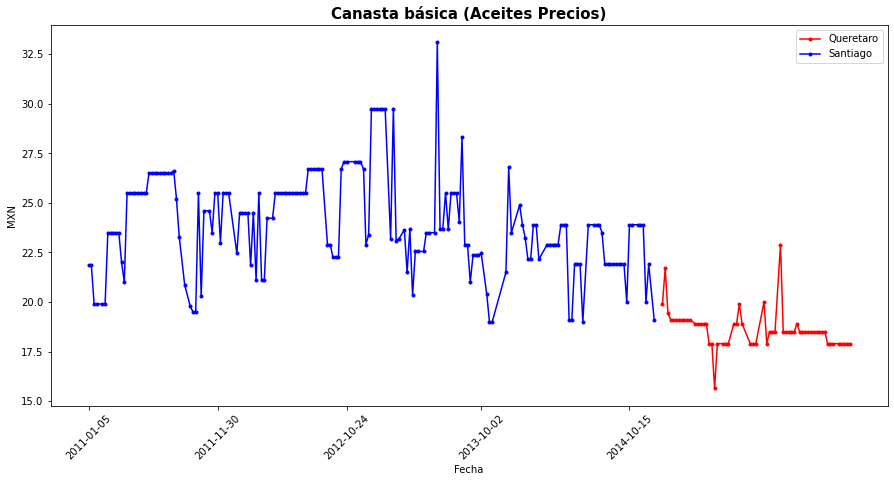

In [91]:
# c) ¿Hay algún patrón estacional entre ellos?
# Podemos ver como se disparan los precios en ciertas fechas por lo que si depende mucho de la estacionalidad.
# vemos que el precio se mantiene cercado a los $ 25 a mediados de año y que a finales e inicios fulctua.

# d) ¿Hay algún patron estacional entre años?
# Si, a mediados de año el precio se suele mantener estable y fluctua a inicios y finales. Exceptuando en el 2013 que fue donde se dió el pico del
# mayor precio.
# Se deberían crear modelos para cada uno de los municipios, después crear un modelo general que los ajuste todos. Por motivos de tiempo solo lo hicimos
# para el caso del precio del Aceite.


plt.figure(figsize=(15,7))

plt.title('Canasta básica (Aceites Precios)', fontdict={'fontweight':'bold', 'fontsize':15})

plt.plot(Aceites_QRO.fechaRegistro, Aceites_QRO.precio, 'r.-', label='Queretaro')
plt.plot(Aceites_Santi.fechaRegistro, Aceites_Santi.precio, 'b.-', label='Santiago')
# 
plt.xticks(Aceites_Santi.fechaRegistro[::43])
plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('MXN')

plt.legend()
plt.show()

In [92]:
# Para hacer el  mismo procedimiento (precio del Aceite 1-2-3) pero a nivel estado:
Base_aceites_estado = sqlContext.sql("""
                SELECT DISTINCT producto, marca, estado,fechaRegistro, precio 
                FROM qqpDF
                WHERE cadenaComercial = 'CHEDRAUI'
                AND producto LIKE '%ACEITE%'
                AND marca = '1-2-3'
                ORDER BY 5 DESC
                """)


In [93]:
Base_aceites_estado.show(5)

+--------+-----+---------+-------------+------+
|producto|marca|   estado|fechaRegistro|precio|
+--------+-----+---------+-------------+------+
|  ACEITE|1-2-3|QUERÉTARO|   2013-06-12|  33.1|
|  ACEITE|1-2-3|  YUCATÁN|   2012-07-30| 31.45|
|  ACEITE|1-2-3|  YUCATÁN|   2012-07-23| 31.45|
|  ACEITE|1-2-3|  MORELOS|   2016-02-29|  30.9|
|  ACEITE|1-2-3|   MÉXICO|   2013-04-23|  29.9|
+--------+-----+---------+-------------+------+
only showing top 5 rows



In [94]:
Base_aceites_estado.registerTempTable('Base_aceites_estado')

In [95]:
# d) ¿Cuál es el estado más caro y en qué mes (Para este caso en el precio del aceite de la canasta básica)?
# NOTA: Este cálculo no diferencia los años para los meses.
# Es Querétaro en Julio.
# Para el caso de la canasta completa se deberían crear bases para cada uno de los productos con su marca y tienda predeterminada,
# sumar los resultados de todos los productos juntos por fecha y sacar el promedio por mes, por falta de tiempo solo lo haremos con el Aceite.
Base_aceites_estado_prom = sqlContext.sql("""
                SELECT  estado,
                        MONTH(fechaRegistro),
                        AVG(precio) AS precio_promedio 
                FROM Base_aceites_estado
                GROUP BY estado, MONTH(fechaRegistro)
                ORDER BY 3 DESC
                """).show(5)

+---------+--------------------+------------------+
|   estado|month(fechaRegistro)|   precio_promedio|
+---------+--------------------+------------------+
|QUERÉTARO|                   7|24.930454687638715|
|  MORELOS|                   8|24.862499713897705|
|  TABASCO|                   8|24.598571504865372|
|  JALISCO|                   7| 24.06707307769031|
|   OAXACA|                   1|24.046428407941544|
+---------+--------------------+------------------+
only showing top 5 rows



In [62]:
# e) ¿cuáles son los principales riesgos de hacer análisis de series de tiempo con estos datos?
# Que muchos productos se midieron en diferentes periodos de tiempo, por lo que están desfasadas las medidas.
# Se puede observar lo anterior claramente en la gráfica de arriba. Donde las mediciones fueron hechas en diferentes meses de distintos años.
# Es decir no tenemos una medición constante en el mismo intervalo para todos los productos.

In [50]:
spark.stop()